In [163]:
# Getting data into right structure
import os
import numpy as np
import pandas as pd
import datetime as date

# Split test train
from sklearn.cross_validation import train_test_split

# Outlier detection
from sklearn import svm

# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.charts
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

#regression line import formula api as alias smf
import statsmodels.formula.api as smf

%matplotlib inline
output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [164]:
DIR = '/Users/JMa/Learn/NHL/'
file = DIR + '/data/processed/comb.csv'
file2 = DIR + '/data/processed/CM.csv'

filename = os.path.join(file)
comb = pd.read_csv(filename)

filename = os.path.join(file2)
CM = pd.read_csv(filename)

# Visualize    
def bplot(df1, df2):   
    # Interactive Bokeh plot
    _tools = 'box_zoom,pan,save,resize,reset,tap,wheel_zoom'
    fig = figure(tools=_tools, title='t-SNE of Players', responsive=True,
                 x_axis_label='Component 1', y_axis_label='Component 2')

    source = ColumnDataSource(df1)
    source2 = ColumnDataSource(df2)
    hover = HoverTool()
    hover.tooltips=[('Player, Age, Year','@Name, @Age, @SeasonEnding'),]
    fig.scatter(df1['x'], df1['y'], source=source, size=8, alpha=0.6,
                line_color='grey', fill_color='grey')

    fig.scatter(df2.x, df2.y, source=source2, size=8, alpha=0.6,
                line_color='red', fill_color='red')
    fig.add_tools(hover)

    show(fig)
    

#bplot(comb, CM)

In [165]:
comb = comb.drop(['PlayerId','Name','SeasonEnding','Team','GamesPlayed','GoalsPerGame','AssistsPerGame','Age','BM','Goals','Assists','TotalPointsPerGame','SeasonsPlayed','SeasonsPlayedOnTeam','SScore','Norm_SScore','Standard_SScore'], axis=1)

In [166]:
comb.dtypes
comb.describe()

,Transfer,x,y
count,5679.000000,5681.000000,5681.000000
mean,0.019194,-0.026294,0.074230
std,0.137217,6.294982,6.160073
min,0.000000,-13.728926,-12.655435
25%,NaN,-4.819100,-4.535940
50%,NaN,-0.026635,-0.182571
75%,NaN,4.694842,4.697721
max,1.000000,13.381479,12.984838


In [171]:
make_moons(noise=0.3, random_state=0),

((array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

In [182]:
comb[comb.Transfer.isnull()]

,Transfer,x,y
4268,NaN,7.460349,0.74717
4862,NaN,-2.941595,-11.54008


In [153]:
datasets = [comb]
# preprocess dataset, split into training and test part
y = comb.Transfer.ravel()
y = y.as_matrix()
X = comb.drop(['Transfer'], axis=1)
X = X.as_matrix()


#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

x_min, x_max = -13.728926 - .5, 13.381479 + .5
y_min, y_max = -12.655435 - .5, 12.984838 + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [154]:
X_train[:, 0].min()

-13.728926493881259

ValueError: Can't handle mix of continuous and binary

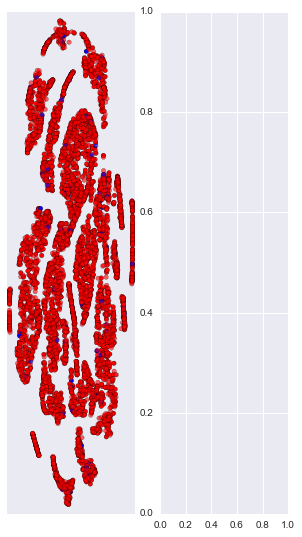

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

datasets = [comb]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    y = comb.Transfer.ravel()
    X = comb.drop(['Transfer'], axis=1)
    X = X.as_matrix()
    #X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()